# Órbitas

Iniciaremos el estudio de sistemas dinámicos considerando mapeos en una dimensión. Los mapeos en una dimensión son simplemente aplicaciones de $F_\mu : \mathbb{R} \rightarrow \mathbb{R}$, de la forma
$$
x_{n+1} = F_\mu (x_n).
$$
Aquí, $x_n$ representa el estado del sistema al "tiempo" $n$.

Por ahora, la única suposición importante para $F_\mu$ es que es una función que no involucra ningún tipo de variable estocástica o nada aleatorio. En este caso diremos que el sistema es determinista: el estado al "tiempo" $n+1$ sólo depende del estado al tiempo $n$, y de los parámetros $\mu$ del mapeo (que permanecen constantes respecto al tiempo).

Iterar la función $F_\mu(x)$ significa evaluarla una y otra vez, a partir de un valor inicial $x_0$ que llamaremos condición inicial. Esto lo escribiremos como $x_1=F_\mu(x_0)$ para el primer iterado, $x_2=F^2_\mu(x_0)=F_\mu(x_1)$ para el segundo, y en general, para el $n$-nésimo iterado escribiremos $x_n=F^n_\mu(x_0)$.

Por ejemplo, para $F(x)=x^2+1$, y omitiéndo el subíndice 0, tendremos $$\begin{eqnarray}
F^2(x) &amp; = &amp; (x^2+1)^2+1,\
F^3(x) &amp; = &amp; ((x^2+1)^2+1)^2+1,\
F^4(x) &amp; = &amp; (((x^2+1)^2+1)^2+1)^2+1,
\end{eqnarray}$$ 
etc.

Hablaremos de una órbita como la secuendia de iterados, es decir, $x_0, x_1, x_2, \dots$. Así, para el ejemplo anterior con $x_0=0$ tendremos $x_1=1$, $x_2 = 2$, $x_3 = 5$, $x_4 = 26$, etc. Esta órbita, aparentemente tiende a infinito con $n\to\infty$.

Hay varios tipos de órbitas. Como veremos, unas órbitas particularmente importantes son los puntos fijos, los cuales satisfacen la ecuación $$
F_\mu(x) = x.
$$

Así, para $F(x)=x^2-x-4$, los puntos fijos satisfacen $x^2-2x-4=0$, cuyas soluciones son $1\pm\sqrt{5}$.

Numéricamente, y usando que conocemos los puntos fijos, tenemos:


Otro tipo importante de órbitas son las órbitas periódicas. En este caso tenemos que una secuencia finita de iterados, se repite: $x_0, x_1, \dots, x_{n-1}, x_0, x_1, \dots$. El menor número de puntos de una órbita periódica (sin repeticiones) es lo que se llama periodo. Cada punto de dicha órbita es periódico con periodo $n$.

Vale la pena notar que los puntos fijos son de periodo 1.

Un punto que pertenece a una órbita de periodo $n$ satisface la ecuación $F^n(x_0) = x_0$. Esto es, un punto de periodo $n$ del mapeo $F$, es un punto fijo del mapeo $F^n$.

Un punto $x_0$ se llama eventualmente periódico cuando, sin ser punto fijo o periódico, después de un cierto número finito de iteraciones, los iterados pertenecen a una órbita periódica. Un ejemplo, para el mapeo $F(x)=x^2-1$, es $x_0=1$: $F(1)=0$, $F^2(0)=-1$, $F^3(-1)=0$, etc.

En sistemas dinámicos típicos, la mayoría de los puntos no son fijos ni periódicos. Por ejemplo, el mapeo $T(x)=2x$ tiene como punto único punto fijo $x^*=0$. Cualquier otra órbita tiende a $\;\pm\infty$, ya que $T^n(x_0) = 2^n x_0$ y entonces $|T^n(x_0)|\to\infty$.

En general, la situación es aún más compleja e interesante.


In [ ]:
using PyPlot

In [1]:
using Plots, LaTeXStrings

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
"""
La función func(f::Function) crea un vector x con condiciones iniciales en un intervalo y un vector y donde 
las evalúa bajo la función f.
"""

function func(f::Function) 
    
    #vx = zeros(Float64, n)
    #vy = zeros(Float64, n)
    
    x = collect(linspace(-5.0, 5.0, 500))
    y = Float64[]
    n = length(x)
    
    #y = f(vx[1])
        
    #vx = Float64[]
    
    
    #push!(vx,x_0)
    #push!(vy,y)
    
    for i in 1:n
        #push!(vx,y)
        fy = f(x[i])
                   
        push!(y,fy)
    end
    return x,y
    #return vy
    
end

func (generic function with 1 method)

#### Ejercicio 1:

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?

In [ ]:
f(x) = x^2 -2

In [4]:
"""
    La función functx, con parámetros f, x_0 y n, regresa los arreglos vx y vy que contienen las n iteraciones de 
los valores de x y f(x) respectivamente. 
"""

function functx(f::Function, x_0::Float64, n::Int64) 
    
    #vx = zeros(Float64, n)
    #vy = zeros(Float64, n)
    
    y = f(x_0)
        
    vx = Float64[]
    vy = Float64[]
    
    push!(vx,x_0)
    push!(vy,y)
    
    for i in 1:n-1
        push!(vx,y)
            y = f(y)
                   
        push!(vy,y)
    end
    return vx,vy
    
end

functx (generic function with 1 method)

In [6]:
f(x)=x^2-2
v_x, v_y = functx(x->f(x), 0.0, 500)

([0.0,-2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0  …  2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0],[-2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0  …  2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0])

In [7]:
v_x = [0.0,-2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0]
v_y = [-2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0];

[Plots.jl] Initializing backend: pyplot



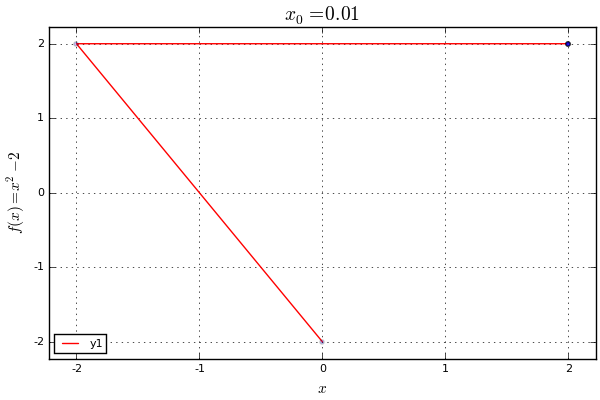

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [9]:

plot(v_x, v_y, c=:red, marker=(:dot,:blue,3,0.2), title=L"x_0 = 0.01", xlabel=L"x")
ylabel!(L"f(x) = x^2 - 2")
xlims!(-2.1, 2.1)
ylims!(-2.1, 2.1)


In [10]:
(v_x1, v_y1)=functx(x->x^2-2, 0.1, 500)

([0.1,-1.99,1.9601,1.84199,1.39293,-0.0597333,-1.99643,1.98574,1.94317,1.77589  …  1.34613,-0.187943,-1.96468,1.85996,1.45944,0.129965,-1.98311,1.93272,1.73541,1.01166],[-1.99,1.9601,1.84199,1.39293,-0.0597333,-1.99643,1.98574,1.94317,1.77589,1.15379  …  -0.187943,-1.96468,1.85996,1.45944,0.129965,-1.98311,1.93272,1.73541,1.01166,-0.976539])

In [ ]:
v_x1;


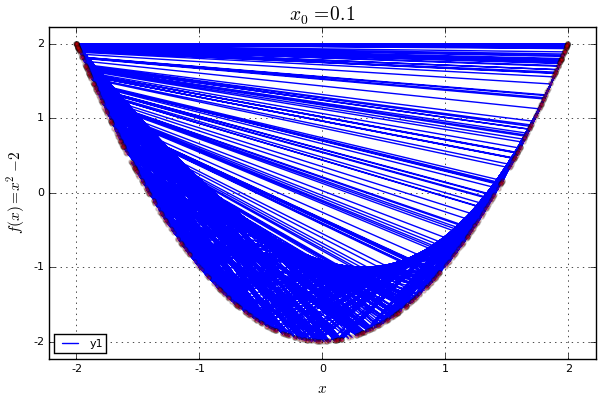

In [18]:

plot(v_x1, v_y1, c=:blue, marker=(:dot,:red,3,0.2), title=(L" x_0=0.1"), xlabel=L"x")
ylabel!(L"f(x) = x^2 - 2")
xlims!(-2.1, 2.1)
ylims!(-2.1, 2.1)

In [19]:
(v_x2, v_y2)=functx(x->x^2 -2, 0.001, 500)

([0.001,-2.0,2.0,1.99998,1.99994,1.99974,1.99898,1.99591,1.98364,1.93482  …  -1.96734,1.87041,1.49845,0.24535,-1.9398,1.76284,1.10759,-0.773239,-1.4021,-0.0341121],[-2.0,2.0,1.99998,1.99994,1.99974,1.99898,1.99591,1.98364,1.93482,1.74353  …  1.87041,1.49845,0.24535,-1.9398,1.76284,1.10759,-0.773239,-1.4021,-0.0341121,-1.99884])


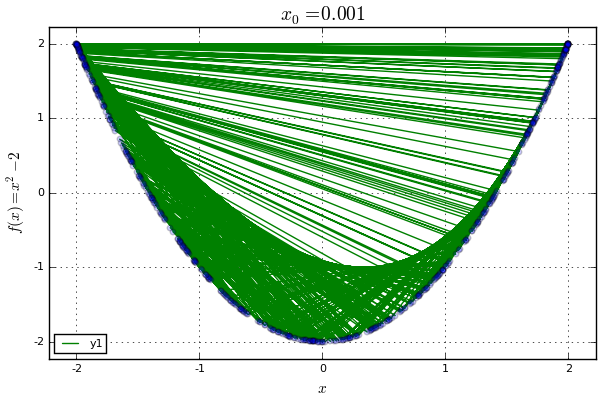

In [26]:

plot(v_x2, v_y2, c=:green, marker=(:dot,:blue,4,0.2), title= L"x_0 = 0.001", xlabel=L"x")
ylabel!(L"f(x) = x^2 - 2")
xlims!(-2.1, 2.1)
ylims!(-2.1, 2.1)


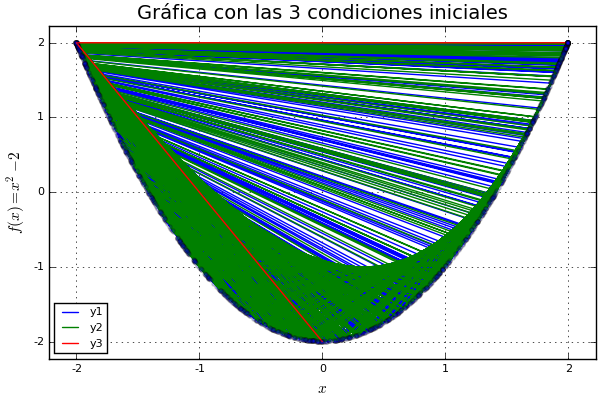

In [22]:

plot(v_x1, v_y1, c=:blue, marker=(:dot,:blue,3,0.2))
plot!(v_x2, v_y2, c=:green, marker=(:dot,:blue,3,0.2))
plot!(v_x, v_y, c=:red, marker=(:dot,:blue,3,0.2))
xlabel!(L"x")
ylabel!(L"f(x) = x^2 - 2")
title!("Gráfica con las 3 condiciones iniciales")
xlims!(-2.1, 2.1)
ylims!(-2.1, 2.1)
#legend!(l:left)

#### Ejercicio 2: 

Escriban una función que, con los argumentos F para el mapeo, x0 para la condición inicial y n para el número de iterados del mapeo (un número entero), genere los n iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.


In [ ]:
"""
La función iter con parámetro x0 y n, itera n veces la función raíz cuadrada de la condición inicial x0.
"""

function iter(x0::Float64, n::Int64)
    #f(x0) = sqrt(x0)
    xs = []
    push!(xs,x0)
    
    for i in 1:n
        x0 = sqrt(x0)
        push!(xs, x0)
    end
    return x0, xs
    
end

In [27]:
#f(x)=sqrt(16)
(v_xs,v_ys) = functx(sqrt, 16.0, 500)

([16.0,4.0,2.0,1.41421,1.18921,1.09051,1.04427,1.0219,1.01089,1.00543  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[4.0,2.0,1.41421,1.18921,1.09051,1.04427,1.0219,1.01089,1.00543,1.00271  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])


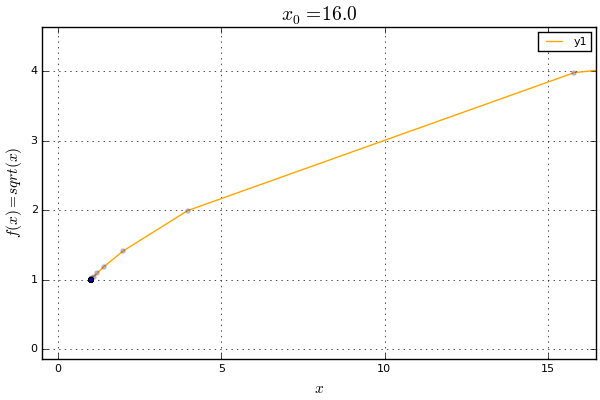

In [31]:
#Gráfica de la raíz cuadrada

plot(v_xs, v_ys, c=:orange, marker=(:dot,:blue,3,0.2), title=L"x_0=16.0", xlabel=L"x")
ylabel!(L"f(x) = sqrt(x)")
xlims!(0.0, 16.0)
ylims!(0.0, 4.5)

La función se acerca al 1.

In [29]:
#f(x)=sqrt(250)
(v_xs,v_ys) = functx(sqrt, 250.0, 500)

([250.0,15.8114,3.97635,1.99408,1.41212,1.18833,1.0901,1.04408,1.0218,1.01084  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[15.8114,3.97635,1.99408,1.41212,1.18833,1.0901,1.04408,1.0218,1.01084,1.00541  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])


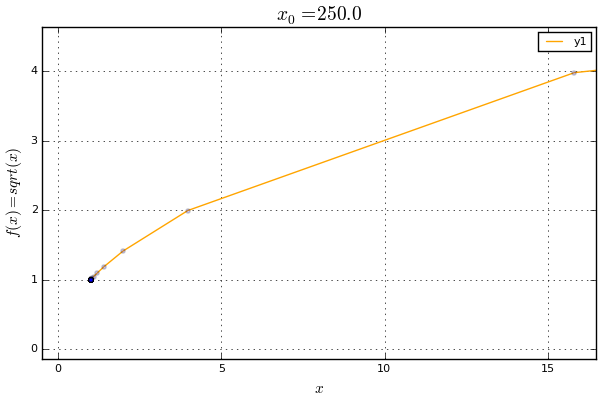

In [32]:
#Gráfica de la raíz cuadrada

plot(v_xs, v_ys, c=:orange, marker=(:dot,:blue,3,0.2), title=L"x_0=250.0", xlabel=L"x")
ylabel!(L"f(x) = sqrt(x)")
xlims!(0.0, 16.0)
ylims!(0.0, 4.5)

In [49]:
function iteramapeoy(f, x, n)
    xx = [x]
    fx = [0.0]
    for it = 1:n
        x1 = f(x)
        push!(xx, x)
        push!(fx, x1)
        x = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end
#NO

iteramapeoy (generic function with 1 method)

In [ ]:
f(x) = x^2-1.1

In [50]:
iteramapeoy(x->x^2-1.1, 0.0, 100)

([0.0,0.0,-1.1,-1.1,0.11,0.11,-1.0879,-1.0879,0.0835264,0.0835264  …  -1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608],[0.0,-1.1,-1.1,0.11,0.11,-1.0879,-1.0879,0.0835264,0.0835264,-1.09302  …  0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608])

#### Ejercicio 3:
Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$.


In [16]:
?functx

search: functx function Function functionloc functionlocs cfunction



```
La función functx, con parámetros f, x_0 y n, regresa los arreglos vx y vy que contienen las n iteraciones de
```

los valores de x y f(x) respectivamente. 


In [35]:
function raiz_cuadrática(a::Real, b::Real, c::Real)
    
    #Definimos el discriminante
    d = (b^2) - 4(a*c)

    #Condiciones
    if a == 0.0 
        print("La ecuación no es cuadrática.")
    end
    
    if d == 0.0
        x1 = x2 = -b/2a
    end
    
    if d > 0
        x1 = (-b + sqrt(d))/2a
        x2 = (-b - sqrt(d))/2a
    end
    
    if d < 0 
        e = sqrt(abs(d)) * im
        x1 = (-b + e)/2a
        x2 = (-b - e)/2a 
    end
            
    return "Las raíces son x1 = $x1 y x2 = $x2"
    
end

raiz_cuadrática (generic function with 1 method)

In [36]:
raiz_cuadrática(1,-1,-1.1)

"Las raíces son x1 = 1.661895003862225 y x2 = -0.6618950038622251"

Los puntos fijos son x1 = 1.661895003862225 y x2 = -0.6618950038622251 

In [40]:
?functx

search: functx function Function functionloc functionlocs cfunction



```
La función functx, con parámetros f, x_0 y n, regresa los arreglos vx y vy que contienen las n iteraciones de
```

los valores de x y f(x) respectivamente. 


In [37]:
(vx3,vy3) = functx(x->x^2 - 1.1, 0.0, 500)

([0.0,-1.1,0.11,-1.0879,0.0835264,-1.09302,0.0947,-1.09103,0.0903506,-1.09184  …  0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161],[-1.1,0.11,-1.0879,0.0835264,-1.09302,0.0947,-1.09103,0.0903506,-1.09184,0.0921075  …  -1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608])

In [38]:
functx(x->x^2 - 1.1,1.0,500)

([1.0,-0.1,-1.09,0.0881,-1.09224,0.0929847,-1.09135,0.0910532,-1.09171,0.0918292  …  -1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608],[-0.1,-1.09,0.0881,-1.09224,0.0929847,-1.09135,0.0910532,-1.09171,0.0918292,-1.09157  …  0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161,0.091608,-1.09161])

In [27]:
?func

search: func functx function Function functionloc functionlocs cfunction



```
La función func crea un vector vx con condiciones iniciales en un intervalo y las evalúa bajo la función f
```


In [39]:
(idx,idy)=func(x->x)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0])

In [40]:
(x, y) = func(x->x^2 -1.1)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[23.9,23.7,23.5008,23.3024,23.1048,22.908,22.7121,22.5169,22.3225,22.1289  …  22.1289,22.3225,22.5169,22.7121,22.908,23.1048,23.3024,23.5008,23.7,23.9])

In [41]:
(xi,yi)=func(x->x)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0])

In [39]:
plot(x,y, color=:blue, label=L"f(x)");

In [45]:
length(vx3)

500

In [42]:
function orb(f::Function, x0::Float64, n::Int64)

    #y = f(x0)
    
    ox = Float64[]
    oy = Float64[]
    
    push!(ox, x0)
    push!(oy, 0)

    for i in 1:n
        
       
        push!(ox, x0)
        y = f(x0)
        push!(oy, y)
        
        push!(ox,y)
        push!(oy,y)
        x0 = y
    end
        return ox, oy
end


orb (generic function with 1 method)

In [43]:
(orbx,orby)=orb(x->x^2 -1.1, 0.0, 500)

([0.0,0.0,-1.1,-1.1,0.11,0.11,-1.0879,-1.0879,0.0835264,0.0835264  …  -1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608],[0.0,-1.1,-1.1,0.11,0.11,-1.0879,-1.0879,0.0835264,0.0835264,-1.09302  …  0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608])

In [73]:
length(orbx)

1001

In [37]:
plot(vx3,vy3, color=:blue, label=L"f(x)");

In [38]:
plot(xi,yi, color=:blue, label=L"f(x)");


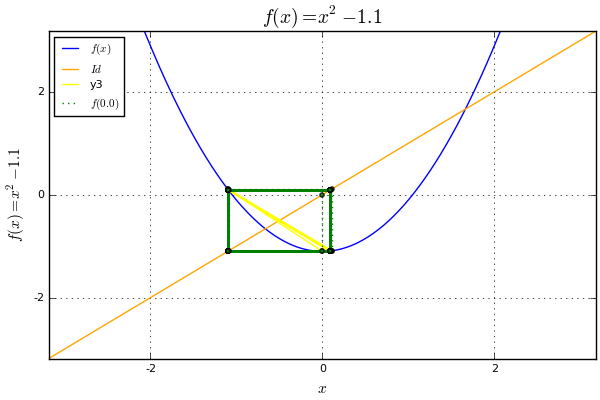

In [44]:

plot(x,y, color=:blue, label=L"f(x)")
plot!(xi, yi, color=:orange, label=L"Id")
plot!(vx3, vy3, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.0)")
plot!(orbx, orby, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.0)")
#plot!(vx3[1],)
title!(L"f(x)=x^2-1.1")
xlabel!(L"x")
ylabel!(L"f(x) = x^2 -1.1")
xlims!(-3.0, 3.0)
ylims!(-3.0, 3.0)


Los puntos fijos son x1 = 1.661895003862225 y x2 = -0.6618950038622251 

#### Ejercicio 4:


Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de esos puntos.
1. $F_1(x) = \frac{1}{3x}$.
2. $F_2(x) = -\frac{x^5}{5}$.
3. $F_3(x) = \frac{x}{2}-2$.

In [45]:
#F1
(v_f1x, v_f1y)= func(x->1/3x)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[-0.0666667,-0.0669349,-0.0672054,-0.067478,-0.0677529,-0.06803,-0.0683094,-0.0685911,-0.0688751,-0.0691615  …  0.0691615,0.0688751,0.0685911,0.0683094,0.06803,0.0677529,0.067478,0.0672054,0.0669349,0.0666667])

In [56]:
#F1
(v_f1x1, v_f1y1)= functx(x->1/3x, 0.02, 500)

([0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667  …  0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667],[16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02  …  16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02,16.6667,0.02])

In [57]:
#Órbita F1
(orbx_f1,orby_f1)=orb(x->1/3x, 0.2, 500)

([0.2,0.2,1.66667,1.66667,0.2,0.2,1.66667,1.66667,0.2,0.2  …  1.66667,0.2,0.2,1.66667,1.66667,0.2,0.2,1.66667,1.66667,0.2],[0.0,1.66667,1.66667,0.2,0.2,1.66667,1.66667,0.2,0.2,1.66667  …  0.2,0.2,1.66667,1.66667,0.2,0.2,1.66667,1.66667,0.2,0.2])

In [52]:
#F1
(v_f1x2, v_f1y2)= functx(x->1/3x, -1.02, 500)

([-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797  …  -1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797],[-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02  …  -0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02,-0.326797,-1.02])

In [53]:
#Órbita F1
(orbx_f12,orby_f12)=orb(x->1/3x, -1.02, 500)

([-1.02,-1.02,-0.326797,-0.326797,-1.02,-1.02,-0.326797,-0.326797,-1.02,-1.02  …  -0.326797,-1.02,-1.02,-0.326797,-0.326797,-1.02,-1.02,-0.326797,-0.326797,-1.02],[0.0,-0.326797,-0.326797,-1.02,-1.02,-0.326797,-0.326797,-1.02,-1.02,-0.326797  …  -1.02,-1.02,-0.326797,-0.326797,-1.02,-1.02,-0.326797,-0.326797,-1.02,-1.02])

In [59]:
#F1
(v_f1x3, v_f1y3)= functx(x->1/3x, -2.3, 500)

([-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928  …  -2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928],[-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3  …  -0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3,-0.144928,-2.3])

In [60]:
#Órbita F1
(orbx_f13,orby_f13)=orb(x->1/3x, -2.3, 500)

([-2.3,-2.3,-0.144928,-0.144928,-2.3,-2.3,-0.144928,-0.144928,-2.3,-2.3  …  -0.144928,-2.3,-2.3,-0.144928,-0.144928,-2.3,-2.3,-0.144928,-0.144928,-2.3],[0.0,-0.144928,-0.144928,-2.3,-2.3,-0.144928,-0.144928,-2.3,-2.3,-0.144928  …  -2.3,-2.3,-0.144928,-0.144928,-2.3,-2.3,-0.144928,-0.144928,-2.3,-2.3])


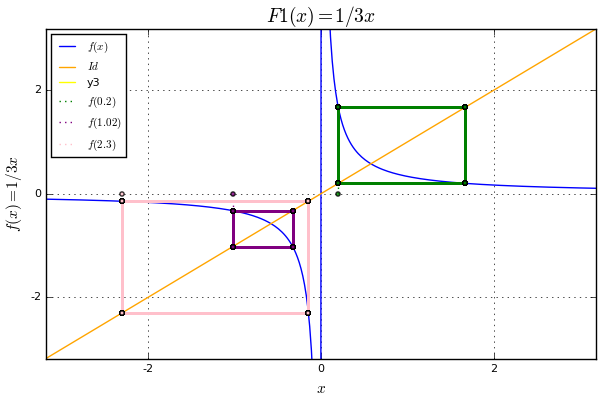

In [62]:
#Gráfica F1

plot(v_f1x, v_f1y, color=:blue, label=L"f(x)")
plot!(xi, yi, color=:orange, label=L"Id")
plot!(v_f1x1, v_f1y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)")
plot!(orbx_f1, orby_f1, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.2)")
plot!(orbx_f12, orby_f12, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(1.02)")
plot!(orbx_f13, orby_f13, color=:pink, marker=(:dot,:pink,3,0.8), line=:dot, label=L"f(2.3)")



#plot!(vx3[1],)
title!(L"F1(x)=1/3x")
xlabel!(L"x")
ylabel!(L"f(x) = 1/3x")
xlims!(-3.0, 3.0)
ylims!(-3.0, 3.0)

In [64]:
#Loa puntos fijos
raiz_cuadrática(3,0,-1)

"Las raíces son x1 = 0.5773502691896257 y x2 = -0.5773502691896257"

In [66]:
#F2
(v_f2x, v_f2y)= func(x->-x^5/5)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[625.0,612.575,600.348,588.318,576.481,564.835,553.378,542.108,531.023,520.119  …  -520.119,-531.023,-542.108,-553.378,-564.835,-576.481,-588.318,-600.348,-612.575,-625.0])

In [67]:
#F2
(v_f2x1, v_f2y1)= functx(x->-x^5/5, 0.02, 500)

([0.02,-6.4e-10,2.14748e-47,-9.13439e-235,0.0,-0.0,0.0,-0.0,0.0,-0.0  …  0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0],[-6.4e-10,2.14748e-47,-9.13439e-235,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0  …  -0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0])

In [68]:
#Órbita F2
(orbx_f2,orby_f2)=orb(x->-x^5/5, 0.2, 500)

([0.2,0.2,-6.4e-5,-6.4e-5,2.14748e-22,2.14748e-22,-9.13439e-110,-9.13439e-110,0.0,0.0  …  -0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0],[0.0,-6.4e-5,-6.4e-5,2.14748e-22,2.14748e-22,-9.13439e-110,-9.13439e-110,0.0,0.0,-0.0  …  0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0])

In [73]:
#F2
(v_f2x2, v_f2y2)= functx(x->-x^5/5, -1.0, 500)

([-1.0,0.2,-6.4e-5,2.14748e-22,-9.13439e-110,0.0,-0.0,0.0,-0.0,0.0  …  -0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0],[0.2,-6.4e-5,2.14748e-22,-9.13439e-110,0.0,-0.0,0.0,-0.0,0.0,-0.0  …  0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0])

In [74]:
#Órbita F2
(orbx_f22,orby_f22)=orb(x->-x^5/5, -1.0, 500)

([-1.0,-1.0,0.2,0.2,-6.4e-5,-6.4e-5,2.14748e-22,2.14748e-22,-9.13439e-110,-9.13439e-110  …  0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0],[0.0,0.2,0.2,-6.4e-5,-6.4e-5,2.14748e-22,2.14748e-22,-9.13439e-110,-9.13439e-110,0.0  …  -0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0])

In [80]:
#Órbita F2
(orbx_f23,orby_f23)=orb(x->-x^5/5, 1.4, 500)

([1.4,1.4,-1.07565,-1.07565,0.287992,0.287992,-0.000396218,-0.000396218,1.953e-18,1.953e-18  …  -0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0],[0.0,-1.07565,-1.07565,0.287992,0.287992,-0.000396218,-0.000396218,1.953e-18,1.953e-18,-5.68248e-90  …  0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0])


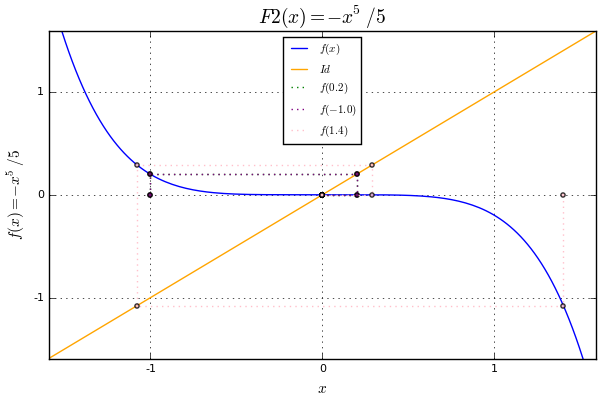

In [81]:
#Gráfica F2

plot(v_f2x, v_f2y, color=:blue, label=L"f(x)")
plot!(xi, yi, color=:orange, label=L"Id")
#plot!(v_f2x1, v_f2y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)")
plot!(orbx_f2, orby_f2, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.2)")
plot!(orbx_f22, orby_f22, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(-1.0)")
plot!(orbx_f23, orby_f23, color=:pink, marker=(:dot,:pink,3,0.8), line=:dot, label=L"f(1.4)")


title!(L"F2(x)=-x^5/5")
xlabel!(L"x")
ylabel!(L"f(x) = -x^5/5")
xlims!(-1.5, 1.5)
ylims!(-1.5, 1.5)

Aquí el único punto fijo es cero.

In [82]:
#F2
(v_f3x, v_f3y)= func(x->(x/2)-2)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[-4.5,-4.48998,-4.47996,-4.46994,-4.45992,-4.4499,-4.43988,-4.42986,-4.41984,-4.40982  …  0.40982,0.41984,0.42986,0.43988,0.4499,0.45992,0.46994,0.47996,0.48998,0.5])

In [83]:
#F3
(v_f3x1, v_f3y1)= functx(x->(x/2)-2, 0.02, 500)

([0.02,-1.99,-2.995,-3.4975,-3.74875,-3.87438,-3.93719,-3.96859,-3.9843,-3.99215  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0],[-1.99,-2.995,-3.4975,-3.74875,-3.87438,-3.93719,-3.96859,-3.9843,-3.99215,-3.99607  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0])

In [84]:
#Órbita F3
(orbx_f3,orby_f3)=orb(x->(x/2)-2, 0.2, 500)

([0.2,0.2,-1.9,-1.9,-2.95,-2.95,-3.475,-3.475,-3.7375,-3.7375  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0],[0.0,-1.9,-1.9,-2.95,-2.95,-3.475,-3.475,-3.7375,-3.7375,-3.86875  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0])

In [89]:
#Órbita F3
(orbx_f32,orby_f32)=orb(x->(x/2)-2, -5.0, 500)

([-5.0,-5.0,-4.5,-4.5,-4.25,-4.25,-4.125,-4.125,-4.0625,-4.0625  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0],[0.0,-4.5,-4.5,-4.25,-4.25,-4.125,-4.125,-4.0625,-4.0625,-4.03125  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0])


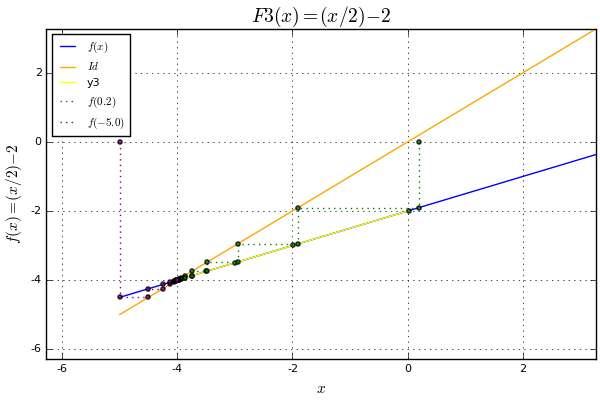

In [90]:
#Gráfica F3

plot(v_f3x, v_f3y, color=:blue, label=L"f(x)")
plot!(xi, yi, color=:orange, label=L"Id")
plot!(v_f3x1, v_f3y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)",  ,)
plot!(orbx_f3, orby_f3, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.2)")
plot!(orbx_f32, orby_f32, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(-5.0)")
title!(L"F3(x)=(x/2)-2")
xlabel!(L"x")
ylabel!(L"f(x) = (x/2)-2")
xlims!(-6.0, 3.0)
ylims!(-6.0, 3.0)

#### Ejercicio 5:
Para el mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

In [98]:
#F(x)
(v_Fx, v_Fy) = functx(x->x*2 -2, 1.2, 20000)

([1.2,0.4,-1.2,-4.4,-10.8,-23.6,-49.2,-100.4,-202.8,-407.6  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf],[0.4,-1.2,-4.4,-10.8,-23.6,-49.2,-100.4,-202.8,-407.6,-817.2  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf])

In [100]:
v_Fy

20000-element Array{Float64,1}:
     0.4
    -1.2
    -4.4
   -10.8
   -23.6
   -49.2
  -100.4
  -202.8
  -407.6
  -817.2
 -1636.4
 -3274.8
 -6551.6
     ⋮  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  
  -Inf  

In [131]:
v_Fy[1024]

-1.4381545078898528e308

In [136]:
vy = []
for i in 1:1024
    push!(vy,v_Fy[i])
    
end


In [146]:
vy

1024-element Array{Any,1}:
     0.4        
    -1.2        
    -4.4        
   -10.8        
   -23.6        
   -49.2        
  -100.4        
  -202.8        
  -407.6        
  -817.2        
 -1636.4        
 -3274.8        
 -6551.6        
     ⋮          
    -7.02224e304
    -1.40445e305
    -2.8089e305 
    -5.61779e305
    -1.12356e306
    -2.24712e306
    -4.49423e306
    -8.98847e306
    -1.79769e307
    -3.59539e307
    -7.19077e307
    -1.43815e308

In [102]:
?histogram

search: histogram histogram! histogram2d histogram2d!



No documentation found.

`Plots.histogram` is a generic `Function`.

```julia
# 1 method for generic function "histogram":
histogram(args...) at /Users/Yuriko/.julia/v0.4/Plots/src/Plots.jl:151
```



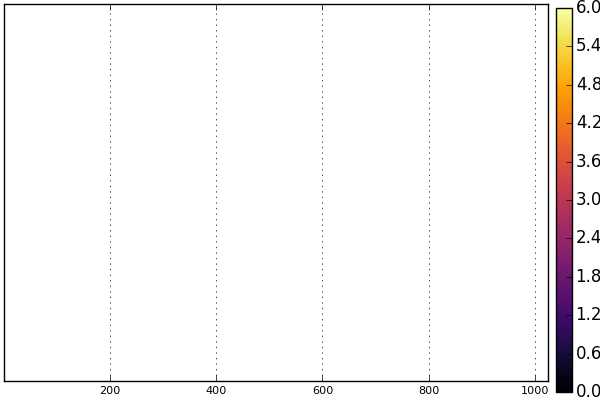

In [148]:
histogram2d(vy, bins=200)

In [141]:
?hist

search: hist hist! hist2d hist2d! histrange histogram histogram! histogram2d



```
hist(v, e) -> e, counts
```

Compute the histogram of `v` using a vector/range `e` as the edges for the bins. The result will be a vector of length `length(e) - 1`, such that the element at location `i` satisfies `sum(e[i] .< v .<= e[i+1])`. Note: Julia does not ignore `NaN` values in the computation.

```
hist(v[, n]) -> e, counts
```

Compute the histogram of `v`, optionally using approximately `n` bins. The return values are a range `e`, which correspond to the edges of the bins, and `counts` containing the number of elements of `v` in each bin. Note: Julia does not ignore `NaN` values in the computation.


#### Ejercicio 6:
Analicen los mapeos
$F(x) = x^2$,
$F(x) = x^3$,
$F(x) = -x^3$,
que se satisface $F(0) = F'(0) = 0$.

In [152]:
#F4
(v_F4x, v_F4y)=func(x->x^2)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[25.0,24.8,24.6008,24.4024,24.2048,24.008,23.8121,23.6169,23.4225,23.2289  …  23.2289,23.4225,23.6169,23.8121,24.008,24.2048,24.4024,24.6008,24.8,25.0])

In [153]:
(v_F4x1, v_F4y1)=functx(x->x^2 , 0.2 , 500)

([0.2,0.04,0.0016,2.56e-6,6.5536e-12,4.29497e-23,1.84467e-45,3.40282e-90,1.15792e-179,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.04,0.0016,2.56e-6,6.5536e-12,4.29497e-23,1.84467e-45,3.40282e-90,1.15792e-179,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [154]:
#Órbita F4
(orbx_f4,orby_f4)=orb(x->x^2, 0.2, 500)

([0.2,0.2,0.04,0.04,0.0016,0.0016,2.56e-6,2.56e-6,6.5536e-12,6.5536e-12  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.04,0.04,0.0016,0.0016,2.56e-6,2.56e-6,6.5536e-12,6.5536e-12,4.29497e-23  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [155]:
#Órbita F4
(orbx_f42,orby_f42)=orb(x->x^2, -0.5, 500)

([-0.5,-0.5,0.25,0.25,0.0625,0.0625,0.00390625,0.00390625,1.52588e-5,1.52588e-5  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.25,0.25,0.0625,0.0625,0.00390625,0.00390625,1.52588e-5,1.52588e-5,2.32831e-10  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])


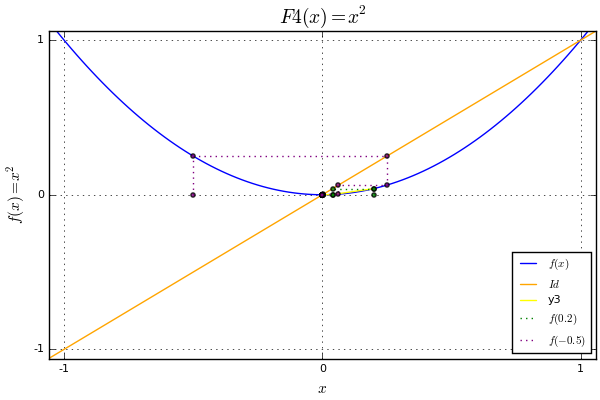

In [157]:
#Gráfica F4

plot(v_F4x, v_F4y, color=:blue, label=L"f(x)")
plot!(xi, yi, color=:orange, label=L"Id")
plot!(v_F4x1, v_F4y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)",  ,)
plot!(orbx_f4, orby_f4, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.2)") #,
plot!(orbx_f42, orby_f42, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(-0.5)") #,


title!(L"F4(x)=x^2")
xlabel!(L"x")
ylabel!(L"f(x) = x^2")
xlims!(-1.0, 1.0)
ylims!(-1.0, 1.0)


Los puntos fijos de la función $F4(x)= x^2$ son el cero y uno.

In [160]:
#F5
(v_F5x, v_F5y)=func(x->x^3)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[-125.0,-123.503,-122.018,-120.545,-119.084,-117.635,-116.197,-114.771,-113.357,-111.955  …  111.955,113.357,114.771,116.197,117.635,119.084,120.545,122.018,123.503,125.0])

In [161]:
(v_F5x1, v_F5y1)=functx(x->x^3 , 0.2 , 500)

([0.2,0.008,5.12e-7,1.34218e-19,2.41785e-57,1.41348e-170,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.008,5.12e-7,1.34218e-19,2.41785e-57,1.41348e-170,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [162]:
#Órbita F5
(orbx_f5,orby_f5)=orb(x->x^3, 0.2, 500)

([0.2,0.2,0.008,0.008,5.12e-7,5.12e-7,1.34218e-19,1.34218e-19,2.41785e-57,2.41785e-57  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.008,0.008,5.12e-7,5.12e-7,1.34218e-19,1.34218e-19,2.41785e-57,2.41785e-57,1.41348e-170  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [163]:
#Órbita F5
(orbx_f52,orby_f52)=orb(x->x^3, -0.6, 500)

([-0.6,-0.6,-0.216,-0.216,-0.0100777,-0.0100777,-1.02349e-6,-1.02349e-6,-1.07214e-18,-1.07214e-18  …  -0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0],[0.0,-0.216,-0.216,-0.0100777,-0.0100777,-1.02349e-6,-1.02349e-6,-1.07214e-18,-1.07214e-18,-1.23241e-54  …  -0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0])


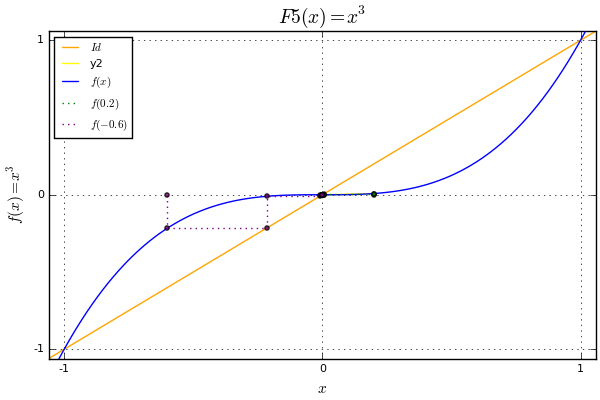

In [165]:
#Gráfica F5



plot(xi, yi, color=:orange, label=L"Id")
plot!(v_F5x1, v_F5y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)",  ,)
plot!(v_F5x, v_F5y, color=:blue, label=L"f(x)")
plot!(orbx_f5, orby_f5, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.2)") #,
plot!(orbx_f52, orby_f52, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(-0.6)")
title!(L"F5(x)=x^3")
xlabel!(L"x")
ylabel!(L"f(x) = x^3")
xlims!(-1.0, 1.0)
ylims!(-1.0, 1.0)



Sus puntos fijos son el -1, 0 y 1

In [166]:
#F6
(v_F6x, v_F6y)=func(x->-x^3)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[125.0,123.503,122.018,120.545,119.084,117.635,116.197,114.771,113.357,111.955  …  -111.955,-113.357,-114.771,-116.197,-117.635,-119.084,-120.545,-122.018,-123.503,-125.0])

In [167]:
(v_F6x1, v_F6y1)=functx(x->-x^3 , 0.5 , 500)

([0.5,-0.125,0.00195313,-7.45058e-9,4.1359e-25,-7.07475e-74,3.54106e-220,-0.0,0.0,-0.0  …  0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0],[-0.125,0.00195313,-7.45058e-9,4.1359e-25,-7.07475e-74,3.54106e-220,-0.0,0.0,-0.0,0.0  …  -0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0])

In [168]:
#Órbita F6
(orbx_f6,orby_f6)=orb(x->-x^3, 0.2, 500)

([0.2,0.2,-0.008,-0.008,5.12e-7,5.12e-7,-1.34218e-19,-1.34218e-19,2.41785e-57,2.41785e-57  …  -0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0],[0.0,-0.008,-0.008,5.12e-7,5.12e-7,-1.34218e-19,-1.34218e-19,2.41785e-57,2.41785e-57,-1.41348e-170  …  0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0])

In [169]:
#Órbita F6
(orbx_f62,orby_f62)=orb(x->-x^3, -0.9, 500)

([-0.9,-0.9,0.729,0.729,-0.38742,-0.38742,0.0581497,0.0581497,-0.000196627,-0.000196627  …  0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0],[0.0,0.729,0.729,-0.38742,-0.38742,0.0581497,0.0581497,-0.000196627,-0.000196627,7.60203e-12  …  -0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0])


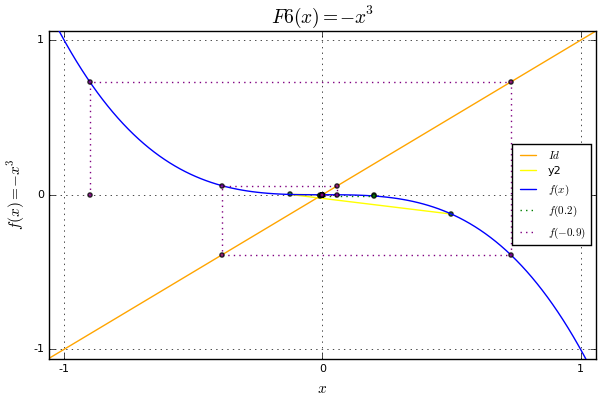

In [170]:
#Gráfica F6



plot(xi, yi, color=:orange, label=L"Id")
plot!(v_F6x1, v_F6y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)",  ,)
plot!(v_F6x, v_F6y, color=:blue, label=L"f(x)")
plot!(orbx_f6, orby_f6, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.2)") #,
plot!(orbx_f62, orby_f62, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(-0.9)") #,


title!(L"F6(x)=-x^3")
xlabel!(L"x")
ylabel!(L"f(x) = -x^3")
xlims!(-1.0, 1.0)
ylims!(-1.0, 1.0)





El punto fijo de la función $F6(x)= -x^3$ es únicamente el cero.

#### Ejercicio 7:
Analicen los mapeos
* $F(x) = x$,
* $F(x) = -x$,
* $F(x) = x-x^2$,
que se satisface 

$F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son neutralmente atractivos o repulsivos).

In [171]:
#F7
(v_F7x, v_F7y)=func(x->x)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0])

In [172]:
(v_F7x1, v_F7y1)=functx(x->x , 0.5 , 500)

([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5  …  0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5  …  0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

In [173]:
#Órbita F7
(orbx_f7,orby_f7)=orb(x->x , 0.5 , 500)

([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5  …  0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],[0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5  …  0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])


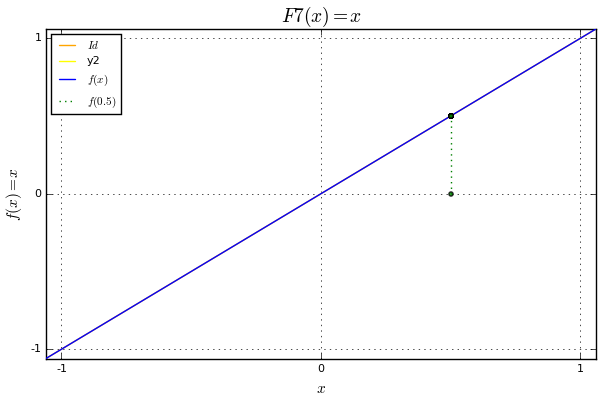

In [174]:
#Gráfica F7



plot(xi, yi, color=:orange, label=L"Id")
plot!(v_F7x1, v_F7y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)",  ,)
plot!(v_F7x, v_F7y, color=:blue, label=L"f(x)")
plot!(orbx_f7, orby_f7, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.5)") #,

title!(L"F7(x)=x")
xlabel!(L"x")
ylabel!(L"f(x) = x")
xlims!(-1.0, 1.0)
ylims!(-1.0, 1.0)



In [175]:
#F8
(v_F8x, v_F8y)=func(x->-x)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[5.0,4.97996,4.95992,4.93988,4.91984,4.8998,4.87976,4.85972,4.83968,4.81964  …  -4.81964,-4.83968,-4.85972,-4.87976,-4.8998,-4.91984,-4.93988,-4.95992,-4.97996,-5.0])

In [176]:
(v_F8x1, v_F8y1)=functx(x->-x , 0.5 , 500)

([0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5  …  0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5],[-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5  …  -0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5,-0.5,0.5])

In [177]:
#Órbita F8
(orbx_f8,orby_f8)=orb(x->-x , 0.5 , 500)

([0.5,0.5,-0.5,-0.5,0.5,0.5,-0.5,-0.5,0.5,0.5  …  -0.5,0.5,0.5,-0.5,-0.5,0.5,0.5,-0.5,-0.5,0.5],[0.0,-0.5,-0.5,0.5,0.5,-0.5,-0.5,0.5,0.5,-0.5  …  0.5,0.5,-0.5,-0.5,0.5,0.5,-0.5,-0.5,0.5,0.5])

In [179]:
#Órbita F8
(orbx_f82,orby_f82)=orb(x->-x , -0.7 , 500)

([-0.7,-0.7,0.7,0.7,-0.7,-0.7,0.7,0.7,-0.7,-0.7  …  0.7,-0.7,-0.7,0.7,0.7,-0.7,-0.7,0.7,0.7,-0.7],[0.0,0.7,0.7,-0.7,-0.7,0.7,0.7,-0.7,-0.7,0.7  …  -0.7,-0.7,0.7,0.7,-0.7,-0.7,0.7,0.7,-0.7,-0.7])


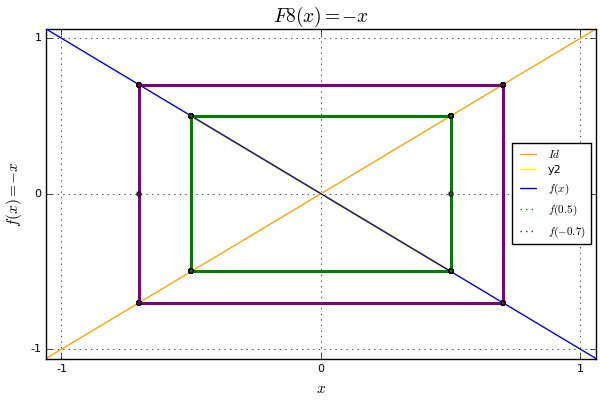

In [180]:
#Gráfica F8

plot(xi, yi, color=:orange, label=L"Id")
plot!(v_F8x1, v_F8y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)",  ,)
plot!(v_F8x, v_F8y, color=:blue, label=L"f(x)")
plot!(orbx_f8, orby_f8, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.5)") #,
plot!(orbx_f82, orby_f82, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(-0.7)") 


title!(L"F8(x)=-x")
xlabel!(L"x")
ylabel!(L"f(x) = -x")
xlims!(-1.0, 1.0)
ylims!(-1.0, 1.0)



El punto fijo es cero

In [182]:
#F9
(v_F9x, v_F9y)=func(x->x-x^2)

([-5.0,-4.97996,-4.95992,-4.93988,-4.91984,-4.8998,-4.87976,-4.85972,-4.83968,-4.81964  …  4.81964,4.83968,4.85972,4.87976,4.8998,4.91984,4.93988,4.95992,4.97996,5.0],[-30.0,-29.78,-29.5607,-29.3423,-29.1247,-28.9078,-28.6918,-28.4766,-28.2622,-28.0486  …  -18.4093,-18.5828,-18.7572,-18.9323,-19.1082,-19.285,-19.4625,-19.6409,-19.82,-20.0])

In [184]:
(v_F9x1, v_F9y1)=functx(x->x-x^2 , 0.5 , 500)

([0.5,0.25,0.1875,0.152344,0.129135,0.112459,0.0998122,0.0898497,0.0817767,0.0750893  …  0.00200812,0.00200409,0.00200007,0.00199607,0.00199209,0.00198812,0.00198417,0.00198023,0.00197631,0.0019724],[0.25,0.1875,0.152344,0.129135,0.112459,0.0998122,0.0898497,0.0817767,0.0750893,0.0694509  …  0.00200409,0.00200007,0.00199607,0.00199209,0.00198812,0.00198417,0.00198023,0.00197631,0.0019724,0.00196851])

In [199]:
#Órbita F9
(orbx_f9,orby_f9)=orb(x->x-x^2, 0.5, 500)

([0.5,0.5,0.25,0.25,0.1875,0.1875,0.152344,0.152344,0.129135,0.129135  …  0.00198812,0.00198417,0.00198417,0.00198023,0.00198023,0.00197631,0.00197631,0.0019724,0.0019724,0.00196851],[0.0,0.25,0.25,0.1875,0.1875,0.152344,0.152344,0.129135,0.129135,0.112459  …  0.00198417,0.00198417,0.00198023,0.00198023,0.00197631,0.00197631,0.0019724,0.0019724,0.00196851,0.00196851])

In [195]:
#Órbita F9
(orbx_f92,orby_f92)=orb(x->x-x^2, 1.3, 500)

([1.3,1.3,-0.39,-0.39,-0.5421,-0.5421,-0.835972,-0.835972,-1.53482,-1.53482  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf],[0.0,-0.39,-0.39,-0.5421,-0.5421,-0.835972,-0.835972,-1.53482,-1.53482,-3.8905  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf])

In [193]:
#Órbita F9
(orbx_f93,orby_f93)=orb(x->x-x^2, -0.7, 500)

([-0.7,-0.7,-1.19,-1.19,-2.6061,-2.6061,-9.39786,-9.39786,-97.7176,-97.7176  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf],[0.0,-1.19,-1.19,-2.6061,-2.6061,-9.39786,-9.39786,-97.7176,-97.7176,-9646.44  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf])


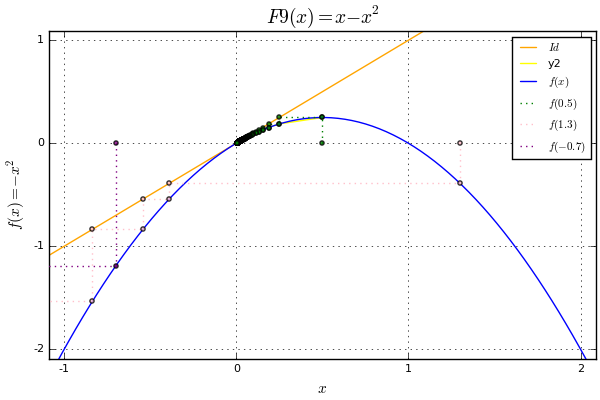

In [202]:
#Gráfica F9

plot(xi, yi, color=:orange, label=L"Id")
plot!(v_F9x1, v_F9y1, color=:yellow, marker=(:dot,:green,3,0.8))#, label=L"f(0.2)",  ,)
plot!(v_F9x, v_F9y, color=:blue, label=L"f(x)")
plot!(orbx_f9, orby_f9, color=:green, marker=(:dot,:green,3,0.8), line=:dot, label=L"f(0.5)") #,
plot!(orbx_f92, orby_f92, color=:pink, marker=(:dot,:pink,3,0.8), line=:dot, label=L"f(1.3)") 
plot!(orbx_f93, orby_f93, color=:purple, marker=(:dot,:purple,3,0.8), line=:dot, label=L"f(-0.7)") 
title!(L"F9(x)=x-x^2")
xlabel!(L"x")
ylabel!(L"f(x) = -x^2")
xlims!(-1.0, 2.0)
ylims!(-2.0, 1.0)



El punto fijo de la función es el cero. Entre 0 y 1 es atractivo, fuera de este intervalo es repulsivo.